In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


In [14]:
# Database connection configuration
user = 'root'
password = 'raghad2531'
host = 'localhost'
port = 3306
target_db = 'rental_star'

engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{target_db}')


In [26]:
def load_monthly_payment_with_date(engine):
    query = """
        SELECT p.date_id, d.full_date, SUM(p.amount) AS total_amount
        FROM fact_monthly_payment p
        JOIN dim_date d ON p.date_id = d.date_id
        GROUP BY p.date_id, d.full_date
        ORDER BY d.full_date
    """
    df = pd.read_sql(query, engine)
    return df

def plot_monthly_payment(df):
    plt.figure(figsize=(14, 6))
    plt.plot(df['full_date'], df['total_amount'], marker='o', linestyle='-', color='blue')
    plt.title('Total Monthly Payment Amount Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Amount ($)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()




def plot_date_distribution_by_year(engine):
    query = "SELECT year, COUNT(*) as day_count FROM dim_date GROUP BY year ORDER BY year"
    df = pd.read_sql(query, engine)
    
    plt.figure(figsize=(10, 5))
    plt.bar(df['year'], df['day_count'], color='skyblue')
    plt.title('Number of Days per Year in dim_date')
    plt.xlabel('Year')
    plt.ylabel('Day Count')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def plot_date_distribution_by_month(engine):
    query = "SELECT month, COUNT(*) as day_count FROM dim_date GROUP BY month ORDER BY month"
    df = pd.read_sql(query, engine)
    
    plt.figure(figsize=(10, 5))
    plt.bar(df['month'], df['day_count'], color='orange')
    plt.title('Number of Days per Month (Aggregated over all years)')
    plt.xlabel('Month')
    plt.ylabel('Day Count')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


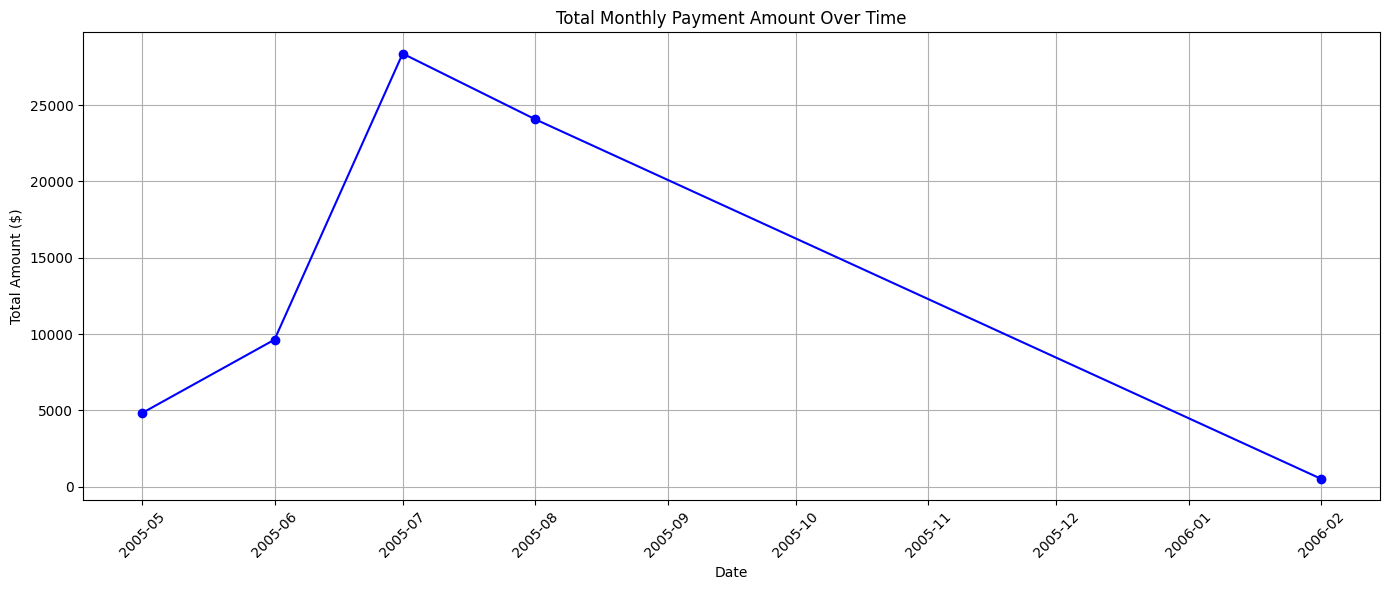

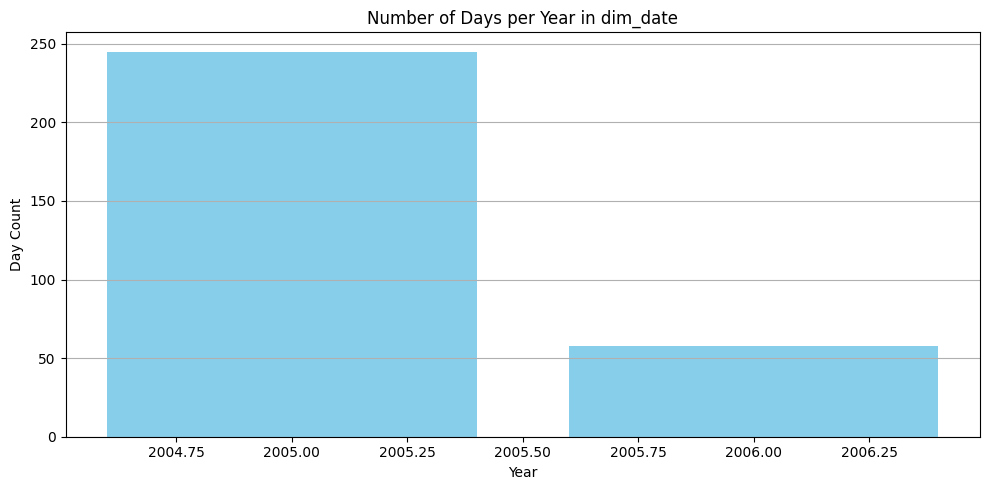

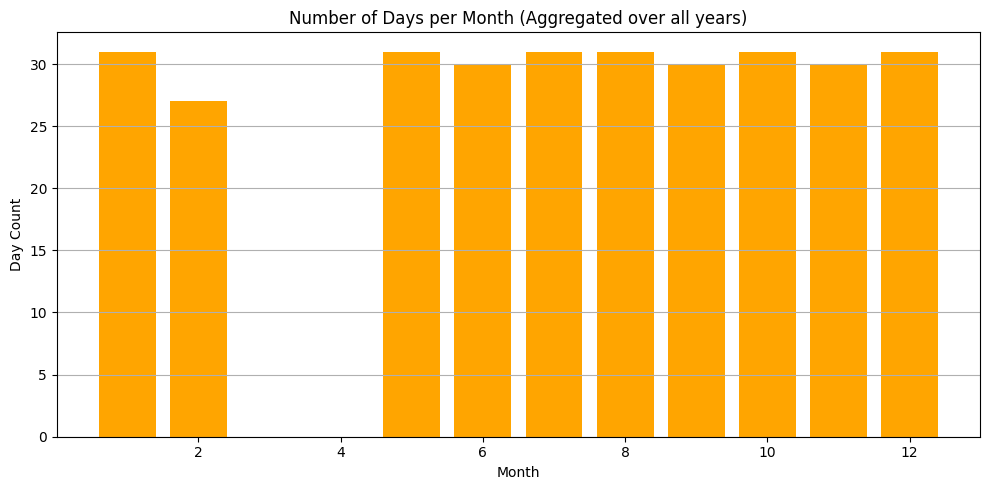

In [27]:
if __name__ == "__main__":
    df_payment = load_monthly_payment_with_date(engine)
    plot_monthly_payment(df_payment)
    
    plot_date_distribution_by_year(engine)
    plot_date_distribution_by_month(engine)


In [ ]:
def summarize_fact_daily_inventory(df):
    print("Summary of fact_daily_inventory:")
    print(f"Total records: {len(df)}")
    
    date_range = (df['date_id'].min(), df['date_id'].max())
    print(f"Date range (date_id): from {date_range[0]} to {date_range[1]}")
    
    print(f"Total inventory quantity (sum): {df['inventory_qty'].sum()}")
    print(f"Average inventory quantity: {df['inventory_qty'].mean():.2f}")
    print(f"Maximum inventory quantity: {df['inventory_qty'].max()}")
    print(f"Minimum inventory quantity: {df['inventory_qty'].min()}")
    
    print(f"Unique films count: {df['film_id'].nunique()}")
    print(f"Unique stores count: {df['store_id'].nunique()}")

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,5))
    plt.hist(df['inventory_qty'], bins=20, color='skyblue')
    plt.title('Distribution of Inventory Quantity')
    plt.xlabel('Inventory Quantity')
    plt.ylabel('Frequency')
    plt.show()


Summary of fact_daily_inventory:
Total records: 1521
Date range (date_id): from 20060215 to 20060215
Total inventory quantity (sum): 4581
Average inventory quantity: 3.01
Maximum inventory quantity: 4
Minimum inventory quantity: 2
Unique films count: 958
Unique stores count: 2


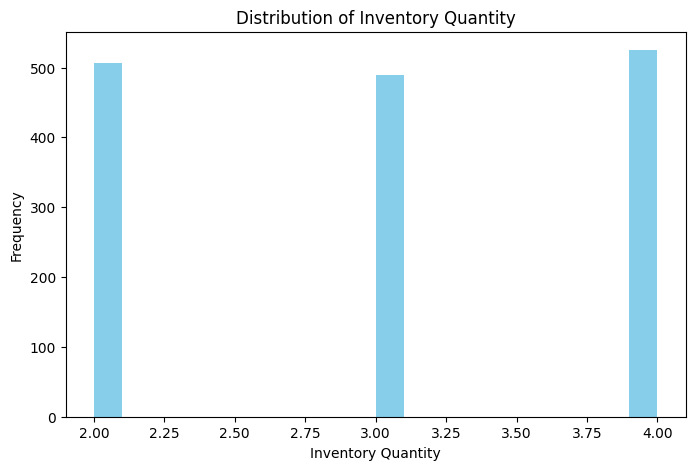

In [29]:
if __name__ == "__main__":
    query = "SELECT * FROM fact_daily_inventory"
    df_inventory = pd.read_sql(query, engine)
    
    summarize_fact_daily_inventory(df_inventory)
